In [4]:
# generating the linear model for prediction. 

import numpy as np 
import matplotlib.pyplot as plt 

def init_weight(input_): 
    weights = {}
    weights['W'] = np.random.rand(input_.shape[1], 1)
    weights['B'] = np.random.randn(1,input_.shape[1])
    return weights 
    

In [18]:
def forward_pass(input_, output_, weights): 
    N = np.dot(input_, weights['W'])
    P = N + weights['B']
    L = np.mean(np.power(output_ - P, 2))
    forward_info = {}
    forward_info['N'] = N 
    forward_info['X'] = input_ 
    forward_info['Y'] = output_ 
    forward_info['P'] = P 
    forward_info['L'] = L 
    
    return forward_info 

In [10]:
def loss_gradients(forward_info, weights): 
    dLdP = -2 * (forward_info['Y'] - forward_info['P'])
    dLdB = np.ones_like(weights['B'])
    dLdB = (dLdB*dLdP).sum(axis = 0)
    
    dPdN = np.ones_like(forward_info['N'])
    dLdN = dLdP*dPdN 
    
    dNdW = np.transpose(forward_info['X'],(1, 0))
    dLdW = np.dot(dNdW, dLdN)
    loss_grad = {}
    loss_grad['W'] = dLdW 
    loss_grad['B'] = dLdB 
    
    return loss_grad 
    

In [13]:
def train(input_, output_, seed = 2000, learning_rate = 0.001): 
    weights =  init_weight(input_) 
    for i in range(0, seed): 
        forward_info = forward_pass(input_, output_, weights) 
        loss_grand = loss_gradients(forward_info, weights)
        for key in loss_grand.keys():  
            weights[key] -= learning_rate * loss_grand[key]
    return weights 

In [15]:
def predict(input_, weights): 
    return np.dot(input_, weights['W']) + weights['B']


{'W': array([[-2.21212504]]), 'B': array([[-0.54543052]])}


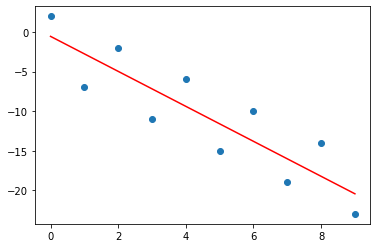

In [30]:
data = [[i] for i in range(0, 10)]
data2 = [[-1 * (i*2 - 2)] if i % 2 == 0 else [-1  * (i*2 + 5)] for i in range(0, 10)]
data = np.array(data)
data2 = np.array(data2)
weights = train(data, data2)
print(weights)
plt.scatter(data, data2)
data2 = predict(data, weights)
plt.plot(data, data2,'r')
plt.show()
